In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🧩 Dataset 3: *Netflix Titles Dataset*

## Data Reading

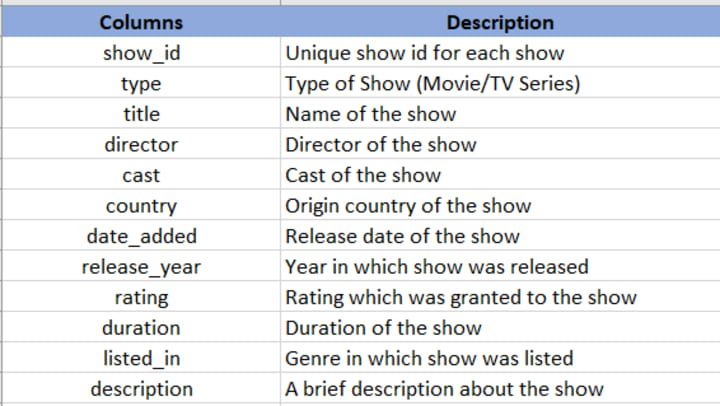

In [94]:
netflix_dataset = pd.read_csv('../data/netflix_titles.csv', index_col='show_id', parse_dates=['date_added'])
netflix_dataset.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [95]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [96]:
netflix_dataset.describe(include='all')

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [97]:
netflix_dataset.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [98]:
netflix_dataset.duplicated().sum()

np.int64(0)

### Handling missing values
* fill director with Unknown because we should not fill the director by most frequent
* fill cast with Unknown because we should not fill the cast by most frequent
* remove the rows where date_added is NaN
* fill country with most frequent
* rating with first get the listed_in of NaN ratings and get mode of that rows

In [99]:
netflix_dataset['director'].fillna('Unknown', inplace=True)
netflix_dataset['cast'].fillna('Unknown', inplace=True)

C:\Users\bvkir\AppData\Local\Temp\ipykernel_3856\1661246178.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_dataset['director'].fillna('Unknown', inplace=True)
C:\Users\bvkir\AppData\Local\Temp\ipykernel_3856\1661246178.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [100]:
netflix_dataset['country'].fillna(netflix_dataset['country'].mode()[0], inplace=True)

C:\Users\bvkir\AppData\Local\Temp\ipykernel_3856\688547909.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_dataset['country'].fillna(netflix_dataset['country'].mode()[0], inplace=True)


In [101]:
netflix_dataset.dropna(subset=['date_added'], inplace=True)
netflix_dataset.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

In [102]:
len(netflix_dataset['listed_in'].unique())

513

In [103]:
netflix_dataset.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

In [104]:
NaN_data_rating = netflix_dataset[pd.isnull(netflix_dataset['rating'])]
NaN_data_rating

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown,"Oprah Winfrey, Ava DuVernay",United States,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
s6828,TV Show,Gargantia on the Verdurous Planet,Unknown,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
s7313,TV Show,Little Lunch,Unknown,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [105]:
for index, row in NaN_data_rating.iterrows():
    print(index )
    print(type(index))
    print(type(row))
    print(row, '===========================================================================')

s5990
<class 'str'>
<class 'pandas.core.series.Series'>
type                                                        Movie
title           13TH: A Conversation with Oprah Winfrey & Ava ...
director                                                  Unknown
cast                                  Oprah Winfrey, Ava DuVernay
country                                             United States
date_added                                       January 26, 2017
release_year                                                 2017
rating                                                        NaN
duration                                                   37 min
listed_in                                                  Movies
description     Oprah Winfrey sits down with director Ava DuVe...
Name: s5990, dtype: object ===========================================================================
s6828
<class 'str'>
<class 'pandas.core.series.Series'>
type                                                      T

In [106]:
NaN_data_duration=netflix_dataset[pd.isnull(netflix_dataset['duration'])]
len(NaN_data_duration)

3

In [107]:
listed_in_groups_for_rating = netflix_dataset.groupby('listed_in')['rating'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'Not Rated')
listed_in_groups_for_duration = netflix_dataset.groupby('listed_in')['duration'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
for index, row in NaN_data_rating.iterrows():
    netflix_dataset.at[index, 'rating'] = listed_in_groups_for_rating[row['listed_in']]
for index, row in NaN_data_duration.iterrows():
    netflix_dataset.at[index, 'duration'] = listed_in_groups_for_duration[row['listed_in']]

netflix_dataset.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## feature engineering

### dates

In [108]:
netflix_dataset.at['s1', 'date_added']

'September 25, 2021'

In [109]:
netflix_dataset.at['s1', 'date_added'].split(',')[1].strip()

'2021'

In [110]:
netflix_dataset.at['s1', 'date_added'].split(',')[0].split(' ')[0]

'September'

In [111]:
netflix_dataset.at['s1', 'date_added'].split(',')[0].split(' ')[1]

'25'

In [112]:
def func_year(date_added):
    return date_added.split(',')[1].strip()
netflix_dataset['added_year'] = netflix_dataset['date_added'].apply(func_year)

def func_month(date_added):
    return date_added.split(',')[0].split(' ')[0]
netflix_dataset['added_month'] = netflix_dataset['date_added'].apply(func_month)

def func_date(date_added):
    return date_added.split(',')[0].split(' ')[1]
netflix_dataset['added_date'] = netflix_dataset['date_added'].apply(func_date)
netflix_dataset.head(1)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_date
show_id,,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,25


### Country

In [113]:
netflix_dataset['country'].value_counts()

country
United States                                    3642
India                                             972
United Kingdom                                    418
Japan                                             244
South Korea                                       199
                                                 ... 
Russia, Spain                                       1
Croatia, Slovenia, Serbia, Montenegro               1
Japan, Canada                                       1
United States, France, South Korea, Indonesia       1
United Arab Emirates, Jordan                        1
Name: count, Length: 748, dtype: int64

In [114]:
country_min_30_count = []
for country, count in netflix_dataset['country'].value_counts().items():
    if count >= 30:
        country_min_30_count.append(country)
    else:
        break

### keeping the rows which country values count >= 30

In [115]:
netflix_dataset_country_30 = netflix_dataset[netflix_dataset['country'].isin(country_min_30_count)]
len(netflix_dataset_country_30)

7392

In [116]:
netflix_dataset_country_30['country'].unique()

array(['United States', 'South Africa', 'India', 'United Kingdom',
       'Mexico', 'Turkey', 'Australia', 'Nigeria', 'Japan', 'France',
       'United Kingdom, United States', 'United States, United Kingdom',
       'South Korea', 'Spain', 'United States, Canada', 'Canada',
       'Hong Kong', 'Italy', 'Argentina', 'Colombia',
       'Canada, United States', 'Brazil', 'Taiwan', 'Germany', 'Thailand',
       'Indonesia', 'Egypt', 'China', 'Philippines'], dtype=object)

In [117]:
top_10_countries = []
top_10_countries_count =[]
counter = 0
for country, count in netflix_dataset['country'].value_counts().items():
    if counter < 10:
        top_10_countries.append(country)
        top_10_countries_count.append(count)
    else:
        break
    counter += 1
len(top_10_countries)

10

In [118]:
all_countries = []
all_countries_count =[]
counter = 0
for country, count in netflix_dataset['country'].value_counts().items():
    all_countries.append(country)
    all_countries_count.append(count)

In [119]:
netflix_dataset_country_top_10 = netflix_dataset[netflix_dataset['country'].isin(top_10_countries)]
len(netflix_dataset_country_top_10)

6141

## visualization

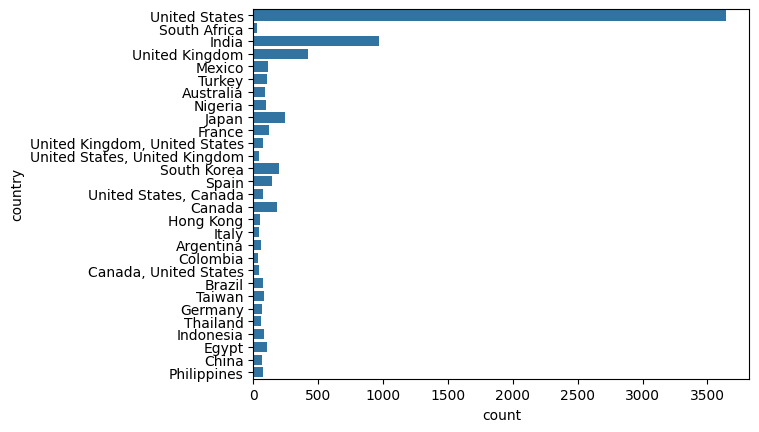

<Figure size 5000x500 with 0 Axes>

In [120]:
sns.countplot(netflix_dataset_country_30, y='country')
plt.figure(figsize=(50,5))
plt.show()

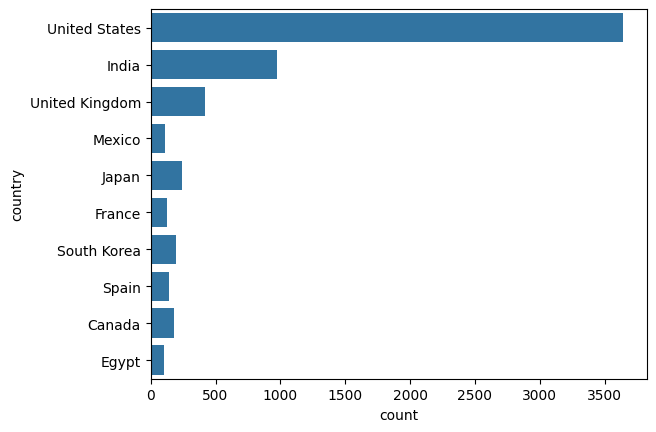

<Figure size 5000x500 with 0 Axes>

In [121]:
sns.countplot(netflix_dataset_country_top_10, y='country')
plt.figure(figsize=(50,5))
plt.show()

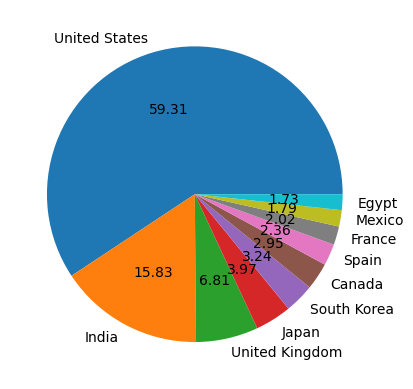

In [122]:
plt.pie(x=top_10_countries_count, labels=top_10_countries, autopct="%.2f")
plt.show()

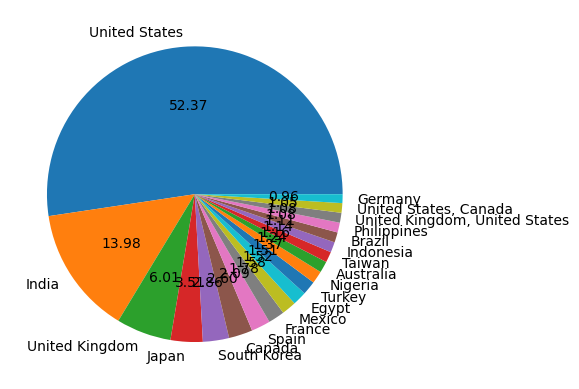

In [123]:
plt.pie(
    x=list(netflix_dataset['country'].value_counts().values)[:20], 
    labels=list(netflix_dataset['country'].value_counts().keys())[:20], 
    autopct="%.2f", 
    )
plt.show()

## number of releases per year, month

In [124]:
netflix_dataset.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'added_year', 'added_month', 'added_date'],
      dtype='object')

In [125]:
netflix_dataset['added_year'].value_counts()

added_year
2019    2016
2020    1879
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: count, dtype: int64

<Axes: xlabel='added_year', ylabel='count'>

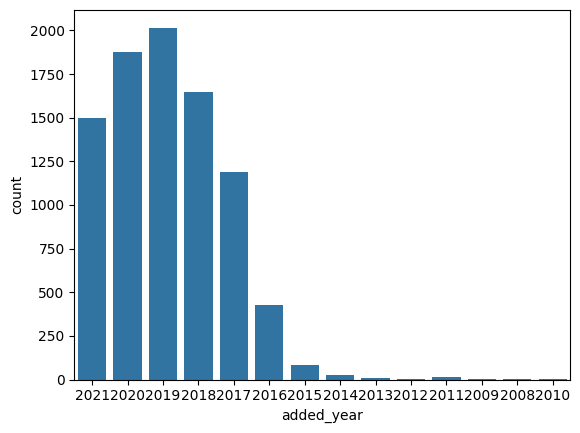

In [126]:
sns.countplot(netflix_dataset, x='added_year')

<Axes: xlabel='count', ylabel='added_month'>

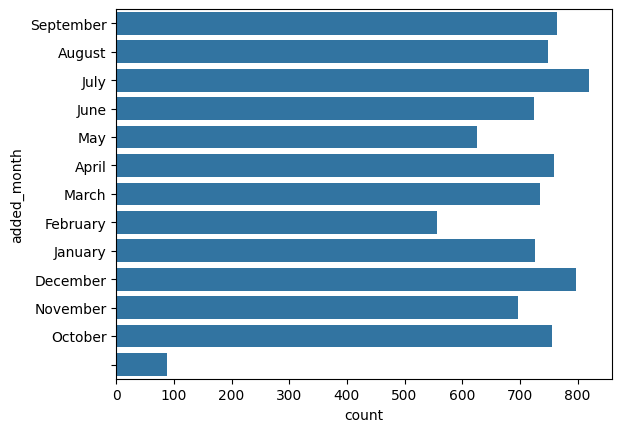

In [127]:
sns.countplot(netflix_dataset, y='added_month')

## type

In [128]:
netflix_dataset['type'].value_counts()

type
Movie      6131
TV Show    2666
Name: count, dtype: int64

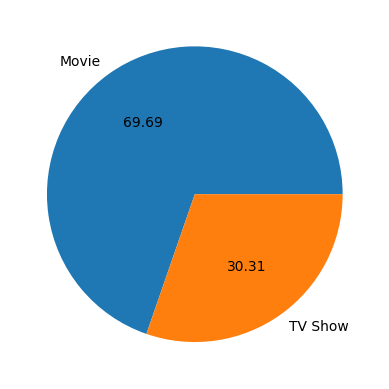

In [129]:
plt.pie(
    x=list(netflix_dataset['type'].value_counts().values), 
    labels=list(netflix_dataset['type'].value_counts().keys()), 
    autopct="%.2f",
)
plt.show()

## directors and listed_in

In [130]:
len((netflix_dataset['listed_in'].value_counts()))

513

In [131]:
group_directors_listed_in = netflix_dataset.groupby(by='director')
group_directors_listed_in.groups

{'A. L. Vijay': ['s3538', 's6079'], 'A. Raajdheep': ['s2390'], 'A. Salaam': ['s5550'], 'A.R. Murugadoss': ['s4050', 's4682'], 'Aadish Keluskar': ['s3603'], 'Aamir Bashir': ['s5768'], 'Aamir Khan': ['s1023'], 'Aanand Rai': ['s2291'], 'Aaron Burns': ['s7375'], 'Aaron Hancox, Michael McNamara': ['s6435'], 'Aaron Hann, Mario Miscione': ['s5893'], 'Aaron Lieber': ['s2779'], 'Aaron Nee, Adam Nee': ['s6227'], 'Aaron Sorkin': ['s1843', 's7480'], 'Aaron Woodley': ['s2563'], 'Aatmaram Dharne': ['s6440'], 'Abba T. Makama': ['s2049', 's6898'], 'Abbas Alibhai Burmawalla, Mastan Alibhai Burmawalla': ['s2286', 's4602', 's6108', 's7213'], 'Abbas Mustan': ['s2075'], 'Abbas Tyrewala': ['s1019'], 'Abby Epstein': ['s3829'], 'Abdellatif Kechiche': ['s6339'], 'Abdul Aziz Hashad': ['s6532'], 'Abdulaziz Alshlahei': ['s437'], 'Abel Ferrara': ['s8716'], 'Abhay Chopra': ['s4946'], 'Abhijeet Deshpande': ['s2017'], 'Abhijit Kokate, Srivinay Salian': ['s3730'], 'Abhijit Panse': ['s2327', 's2337'], 'Abhinay Deo': ['

In [132]:
len(group_directors_listed_in.groups)

4529

In [133]:
group_directors_listed_in.get_group('A. L. Vijay')

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_date
show_id,,,,,,,,,,,,,,
s3538,Movie,Watchman,A. L. Vijay,"G.V. Prakash Kumar, Samyuktha Hegde, Suman, Ra...",India,"September 4, 2019",2019,TV-14,93 min,"Comedies, Dramas, International Movies","Rushing to pay off a loan shark, a young man b...",2019,September,4
s6079,Movie,Abhinetri,A. L. Vijay,"Tamannaah Bhatia, Prabhu Deva, Sonu Sood, Sapt...",India,"May 1, 2018",2016,TV-14,131 min,"Comedies, International Movies, Sci-Fi & Fantasy","Due to family pressure, a corporate man reluct...",2018,May,1


In [134]:
from wordcloud import WordCloud

In [135]:
text = " ".join(group_directors_listed_in.get_group('A. L. Vijay')['listed_in'])
text

'Comedies, Dramas, International Movies Comedies, International Movies, Sci-Fi & Fantasy'

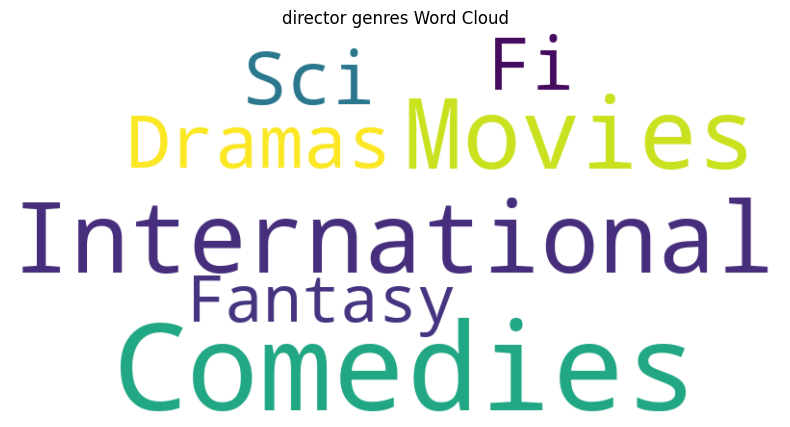

In [136]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("director genres Word Cloud")
plt.show()

In [137]:
text = " ".join(netflix_dataset['listed_in']).split(',')
text = " ".join(list(set(text).difference({'&'}))[:200])
text

" Music & Musicals Dramas Classic Movies  International Movies Action & Adventure Sci-Fi & Fantasy  Dramas Stand-Up Comedy Stand-Up Comedy Stand-Up Comedy Stand-Up Comedy Comedies  International TV Shows Documentaries Documentaries  Independent Movies TV Comedies  Thrillers Documentaries Action & Adventure International TV Shows  Thrillers Anime Features  Reality TV Action & Adventure  Children & Family Movies Anime Series  TV Horror Anime Features  Faith & Spirituality International TV Shows  Spanish-Language TV Shows Crime TV Shows  Spanish-Language TV Shows Anime Features Dramas  Kids' TV Action & Adventure  Sports Movies Dramas Comedies  LGBTQ Movies Anime Series  TV Comedies Kids' TV Comedies  Teen TV Shows Action & Adventure International TV Shows  Romantic Movies Movies Movies Movies Movies Movies Movies Kids' TV Dramas  TV Dramas Action & Adventure Classic Movies  Romantic Movies Reality TV Dramas  International Movies Stand-Up Comedy Thrillers Comedies  TV Dramas Dramas Intern

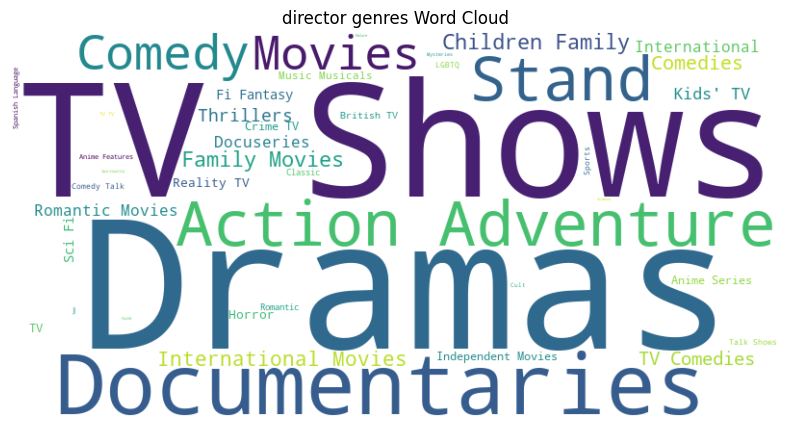

In [138]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("director genres Word Cloud")
plt.show()

In [139]:
netflix_dataset['duration_type'] = netflix_dataset['duration'].apply(lambda x: 'Season' if 'Season' in str(x) else 'Minute')
netflix_dataset['duration_value'] = netflix_dataset['duration'].str.extract('(\d+)').astype(float)
netflix_dataset.head()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\bvkir\AppData\Local\Temp\ipykernel_3856\3180293535.py:2: SyntaxWarning: invalid escape sequence '\d'
  netflix_dataset['duration_value'] = netflix_dataset['duration'].str.extract('(\d+)').astype(float)


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_date,duration_type,duration_value
show_id,,,,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,25,Minute,90.0
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,24,Season,2.0
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,24,Season,1.0
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,24,Season,1.0
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,24,Season,2.0


<Axes: xlabel='type', ylabel='duration_value'>

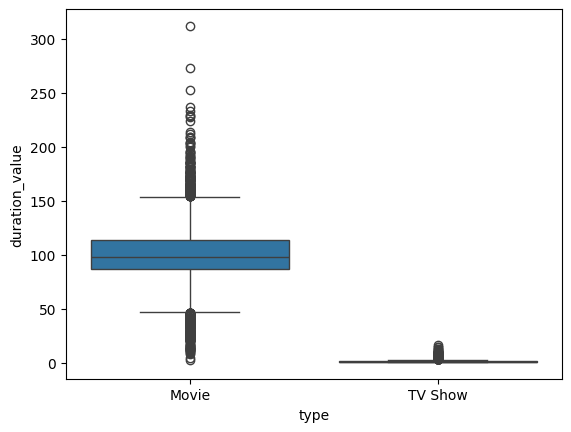

In [140]:
sns.boxplot(x='type', y='duration_value', data=netflix_dataset)

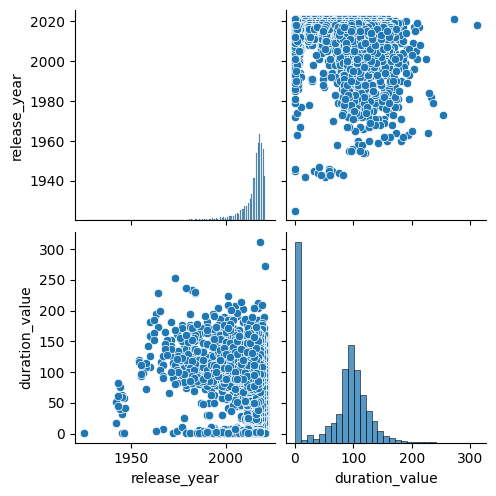

In [141]:
sns.pairplot(netflix_dataset)

# 🧩 Dataset 4: *Supermarket Sales Data*

## Data Reading

In [156]:
SuperMarket_dataset = pd.read_csv('../data/SuperMarket Analysis.csv', index_col='Invoice ID', parse_dates=['Date'])
SuperMarket_dataset.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [157]:
SuperMarket_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   1000 non-null   object        
 1   City                     1000 non-null   object        
 2   Customer type            1000 non-null   object        
 3   Gender                   1000 non-null   object        
 4   Product line             1000 non-null   object        
 5   Unit price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Sales                    1000 non-null   float64       
 9   Date                     1000 non-null   datetime64[ns]
 10  Time                     1000 non-null   object        
 11  Payment                  1000 non-null   object        
 12  cogs                  

In [158]:
SuperMarket_dataset.describe()

,Unit price,Quantity,Tax 5%,Sales,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858


In [159]:
SuperMarket_dataset.isnull().sum() # No duplicates

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [160]:
categorical_columns = []
numerical_columns = []
date_columns = []

for col in SuperMarket_dataset.columns:
    if SuperMarket_dataset[col].dtype in ['float64', 'int64']:
        numerical_columns.append(col)
    elif SuperMarket_dataset[col].dtype == 'object':
        categorical_columns.append(col)
    else:
        date_columns.append(col)

In [161]:
numerical_columns, categorical_columns, date_columns

(['Unit price',
  'Quantity',
  'Tax 5%',
  'Sales',
  'cogs',
  'gross margin percentage',
  'gross income',
  'Rating'],
 ['Branch',
  'City',
  'Customer type',
  'Gender',
  'Product line',
  'Time',
  'Payment'],
 ['Date'])

In [162]:
SuperMarket_dataset['Unit price'].quantile(0.25)

np.float64(32.875)

In [163]:
outliers_index = set()

for col in numerical_columns:
    Q1 = SuperMarket_dataset[col].quantile(0.25)  
    Q3 = SuperMarket_dataset[col].quantile(0.75)  
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5 * IQR 
    lower_fence = Q1 - 1.5 * IQR  

    outliers = SuperMarket_dataset[(SuperMarket_dataset[col] < lower_fence) | (SuperMarket_dataset[col] > upper_fence)].index
    print(outliers)
    outliers_index.update(outliers)  

Index([], dtype='object', name='Invoice ID')
Index([], dtype='object', name='Invoice ID')
Index(['234-65-2137', '687-47-8271', '860-79-0874', '554-42-2417',
       '271-88-8734', '283-26-5248', '751-41-9720', '744-16-7898',
       '303-96-2227'],
      dtype='object', name='Invoice ID')
Index(['234-65-2137', '687-47-8271', '860-79-0874', '554-42-2417',
       '271-88-8734', '283-26-5248', '751-41-9720', '744-16-7898',
       '303-96-2227'],
      dtype='object', name='Invoice ID')
Index(['234-65-2137', '687-47-8271', '860-79-0874', '554-42-2417',
       '271-88-8734', '283-26-5248', '751-41-9720', '744-16-7898',
       '303-96-2227'],
      dtype='object', name='Invoice ID')
Index([], dtype='object', name='Invoice ID')
Index(['234-65-2137', '687-47-8271', '860-79-0874', '554-42-2417',
       '271-88-8734', '283-26-5248', '751-41-9720', '744-16-7898',
       '303-96-2227'],
      dtype='object', name='Invoice ID')
Index([], dtype='object', name='Invoice ID')


In [164]:
outliers_index

{'234-65-2137',
 '271-88-8734',
 '283-26-5248',
 '303-96-2227',
 '554-42-2417',
 '687-47-8271',
 '744-16-7898',
 '751-41-9720',
 '860-79-0874'}

In [165]:
SuperMarket_dataset= SuperMarket_dataset[~SuperMarket_dataset.index.isin(outliers_index)]

In [166]:
len(SuperMarket_dataset)

991

In [167]:
total_sales_by_gender = SuperMarket_dataset.groupby('Gender')['Sales'].sum()
total_sales_by_gender

Gender
Female    188527.0275
Male      125228.2815
Name: Sales, dtype: float64

In [179]:
SuperMarket_dataset['Gender'].value_counts()

Gender
Female    565
Male      426
Name: count, dtype: int64

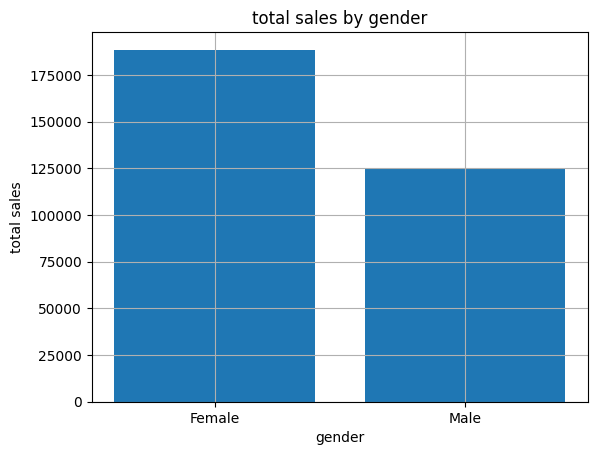

In [178]:
plt.bar(total_sales_by_gender.index, total_sales_by_gender.values)
plt.xlabel('gender')
plt.ylabel('total sales')
plt.title('total sales by gender')
plt.grid(True)
plt.show()

In [182]:
avg_sales_by_gender = SuperMarket_dataset.groupby('Gender')['Sales'].mean()
avg_sales_by_gender

Gender
Female    333.676155
Male      293.963102
Name: Sales, dtype: float64

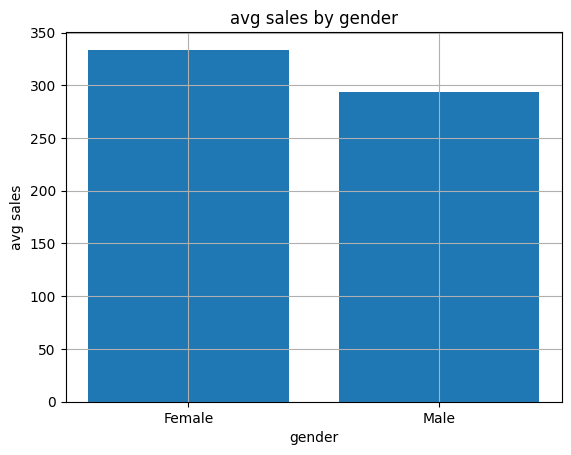

In [183]:
plt.bar(avg_sales_by_gender.index, avg_sales_by_gender.values)
plt.xlabel('gender')
plt.ylabel('avg sales')
plt.title('avg sales by gender')
plt.grid(True)
plt.show()

In [216]:
sales_by_gender_and_branch = SuperMarket_dataset.groupby(by=['Gender', 'Branch'])['Sales'].sum()
(sales_by_gender_and_branch)

Gender  Branch
Female  Alex      63277.7565
        Cairo     59165.2110
        Giza      66084.0600
Male    Alex      41883.3240
        Cairo     44987.5860
        Giza      38357.3715
Name: Sales, dtype: float64

In [217]:
x=[]
for i in sales_by_gender_and_branch.index:
    x.append(str(i))
x

["('Female', 'Alex')",
 "('Female', 'Cairo')",
 "('Female', 'Giza')",
 "('Male', 'Alex')",
 "('Male', 'Cairo')",
 "('Male', 'Giza')"]

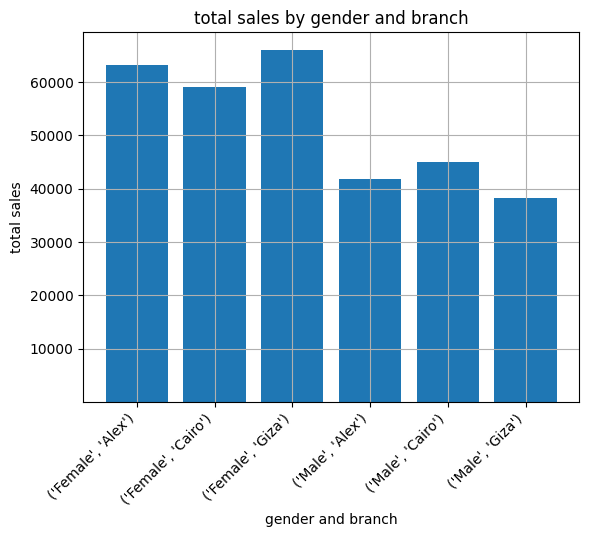

In [218]:
plt.bar(x, height= sales_by_gender_and_branch.values, bottom=0.5)
plt.xlabel('gender and branch')
plt.ylabel('total sales')
plt.title('total sales by gender and branch')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.show()

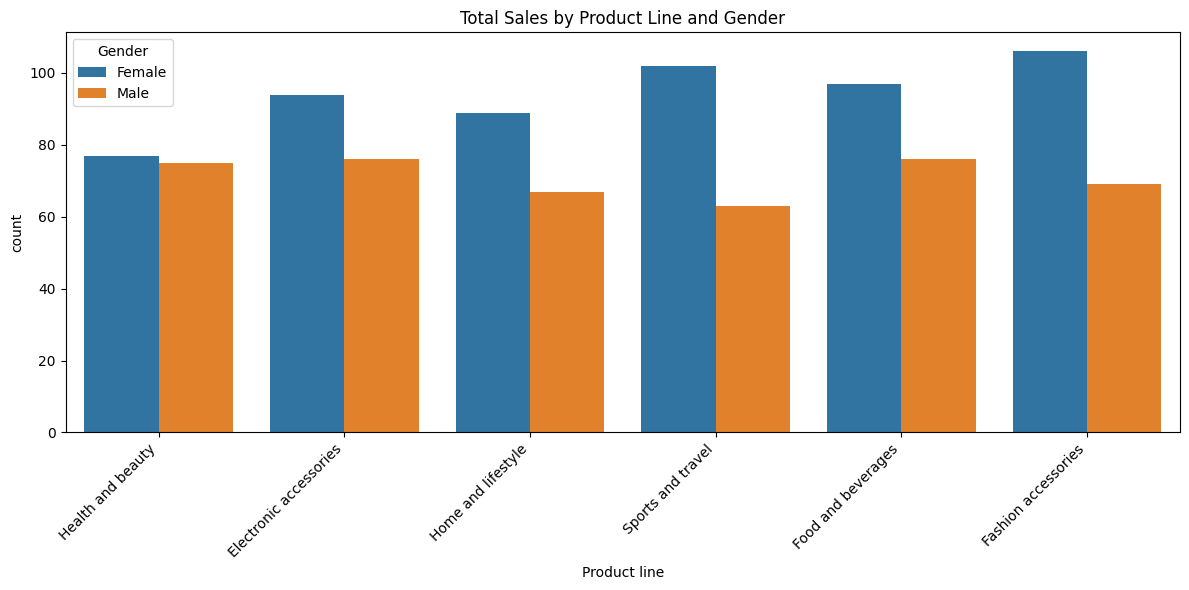

In [237]:
plt.figure(figsize=(12,6))
sns.countplot(data=SuperMarket_dataset, x='Product line', hue='Gender')
plt.title('Total Sales by Product Line and Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [238]:
product_line_summary_with_branch = SuperMarket_dataset.groupby('Branch')

In [244]:
product_line_summary_with_branch.groups.keys()

dict_keys(['Alex', 'Cairo', 'Giza'])

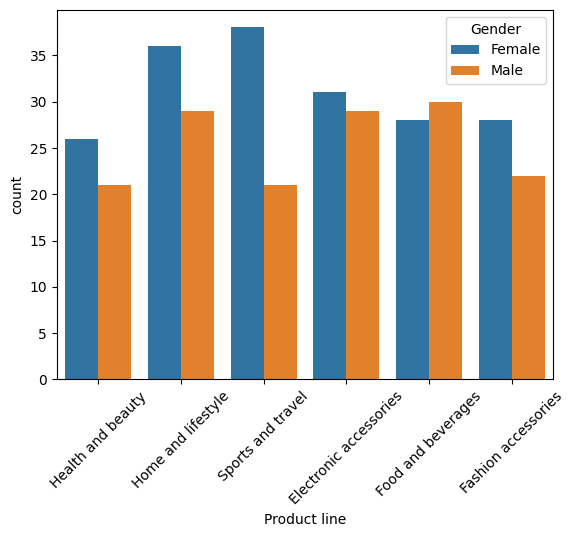

In [243]:
sns.countplot(data=product_line_summary_with_branch.get_group('Alex'), x='Product line', hue='Gender')
plt.xticks(rotation=45)
plt.show()

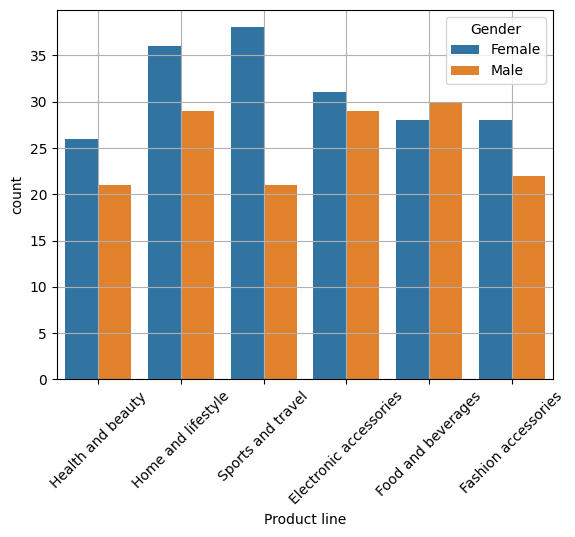

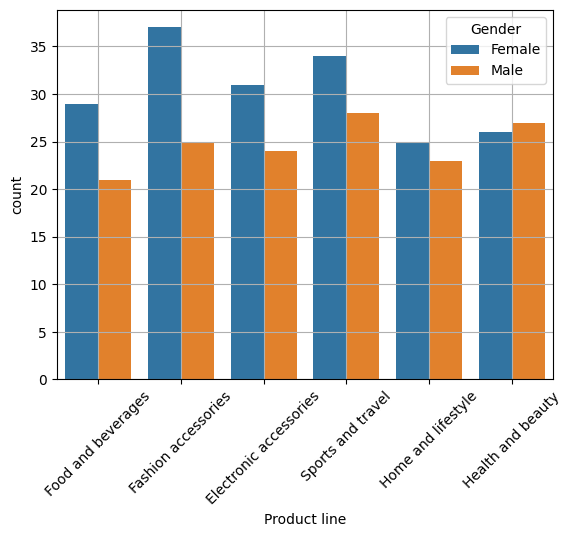

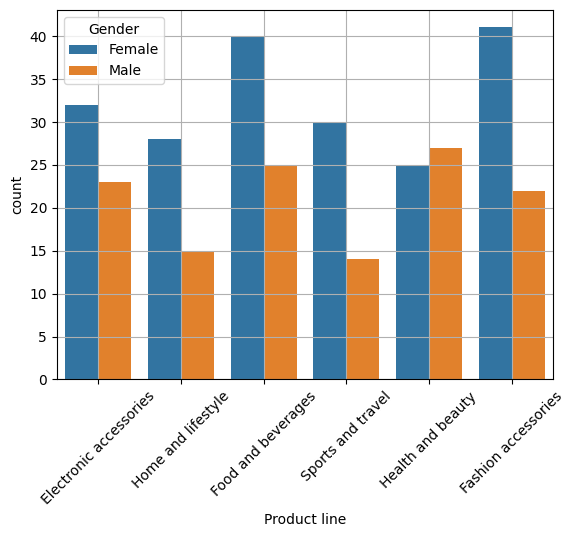

In [247]:
for branch in list(product_line_summary_with_branch.groups.keys()):
    sns.countplot(data=product_line_summary_with_branch.get_group(branch), x='Product line', hue='Gender')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [250]:
correlation_matrix =SuperMarket_dataset.corr(numeric_only=True)
correlation_matrix

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,-0.011506,0.623355,0.623355,0.623355,NaN,0.623355,-0.002527
Quantity,-0.011506,1.000000,0.699290,0.699290,0.699290,NaN,0.699290,-0.009694
Tax 5%,0.623355,0.699290,1.000000,1.000000,1.000000,NaN,1.000000,-0.026092
Sales,0.623355,0.699290,1.000000,1.000000,1.000000,NaN,1.000000,-0.026092
cogs,0.623355,0.699290,1.000000,1.000000,1.000000,NaN,1.000000,-0.026092
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.623355,0.699290,1.000000,1.000000,1.000000,NaN,1.000000,-0.026092
Rating,-0.002527,-0.009694,-0.026092,-0.026092,-0.026092,NaN,-0.026092,1.000000


In [260]:
correlation_matrix.loc['gross income', 'Quantity']

np.float64(0.6992902598698099)

<Axes: >

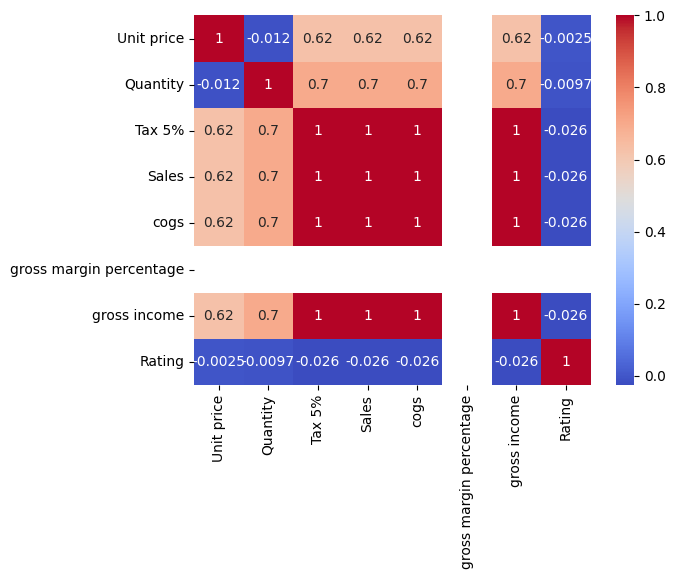

In [259]:
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

In [267]:
SuperMarket_dataset['Month'] = SuperMarket_dataset['Date'].dt.month_name()

In [268]:
monthly_sales = SuperMarket_dataset.groupby('Month')['Sales'].sum()
monthly_sales

Month
February     94116.729
January     111205.563
March       108433.017
Name: Sales, dtype: float64

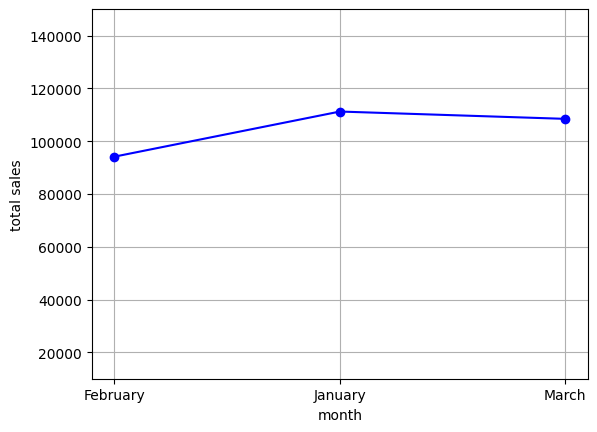

In [276]:
plt.plot(monthly_sales.index, monthly_sales.values,marker='o', linestyle='-', color='b')
plt.xlabel('month')
plt.ylabel('total sales')
plt.grid(True)
plt.ylim(bottom=10000, top=150000) 
plt.show()

<Axes: ylabel='Sales'>

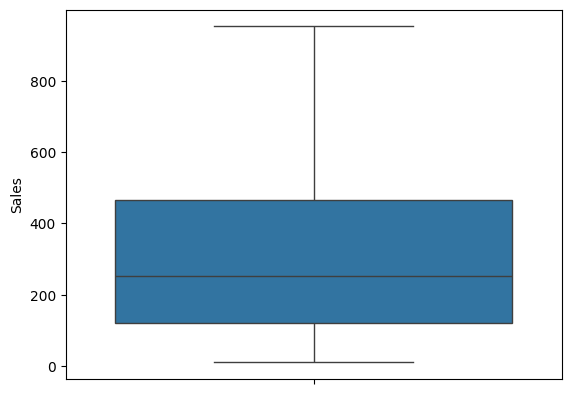

In [280]:
sns.boxplot(SuperMarket_dataset, y='Sales')